In [1]:
from IPython.display import display
import spot
spot.setup()

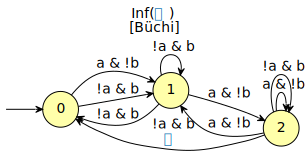

In [2]:
unused_example=spot.automaton("""
HOA: v1
States: 3
Start: 0
name: "Hello world"
AP: 2 "a" "b"
properties: trans-acc
Acceptance: 1 Inf(0)
--BODY--
State: 0
[ 0&!1] 0
[ 0&!1] 2
[!0& 1] 1
State: 1
[ 0&!1] 0 {0}
[!0& 1] 1
State: 2
[ 0&!1] 2 {0}
--END--
""")
example=spot.automaton("""
HOA: v1
States: 3
Start: 0
name: "Hello world"
AP: 2 "a" "b"
properties: trans-acc
Acceptance: 1 Inf(0)
--BODY--
State: 0
[ 0&!1] 1
[!0& 1] 1
State: 1
[!0& 1] 0
[!0& 1] 1
[ 0&!1] 2
State: 2
[ 0&!1] 2
[!0& 1] 2
[ 0&!1] 1
[!0& 1] 0 {0}
--END--
""")
example.save("example_for_slim.hoa")

In [3]:
!\
`# Command to construct slim BA automaton` \
cat example_for_slim.hoa|/home/psimovec/automaty/seminator/seminator --slim --pure --scc-aware=0 > slim.hoa && \
cat "slim.hoa"

HOA: v1
States: 13
Start: 0
AP: 2 "a" "b"
acc-name: Buchi
Acceptance: 1 Inf(0)
properties: trans-labels explicit-labels trans-acc
--BODY--
State: 0 "{0} , ∅ , 0"
[!0&1] 1
[0&!1] 1
State: 1 "{1} , ∅ , 0"
[!0&1] 2
[0&!1] 3
State: 2 "{0,1} , ∅ , 0"
[!0&1] 2
[0&!1] 4
State: 3 "{2} , ∅ , 0"
[!0&1] 0 {0}
[!0&1] 5
[0&!1] 4
State: 4 "{1,2} , ∅ , 0"
[!0&1] 0 {0}
[!0&1] 6
[0&!1] 4
State: 5 "{0,2} , {0} , 0"
[!0&1] 2 {0}
[!0&1] 7
[0&!1] 1 {0}
[0&!1] 8
State: 6 "{0,1,2} , {0} , 0"
[!0&1] 2 {0}
[!0&1] 7
[0&!1] 1 {0}
[0&!1] 8
State: 7 "{0,1,2} , {0,1} , 0"
[!0&1] 2 {0}
[!0&1] 7
[0&!1] 4 {0}
State: 8 "{1,2} , {1} , 0"
[!0&1] 2 {0}
[!0&1] 7
[0&!1] 3 {0}
[0&!1] 9
State: 9 "{1,2} , {2} , 0"
[!0&1] 10 {0}
[!0&1] 11
[0&!1] 4 {0}
State: 10 "{0,2} , ∅ , 0"
[!0&1] 0 {0}
[!0&1] 6
[0&!1] 4
State: 11 "{0,1,2} , {0,2} , 0"
[!0&1] 12 {0}
[!0&1] 6 {0}
[0&!1] 4 {0}
State: 12 "{0,1,2} , ∅ , 0"
[!0&1] 0 {0}
[!0&1] 6
[0&!1] 4
--END--

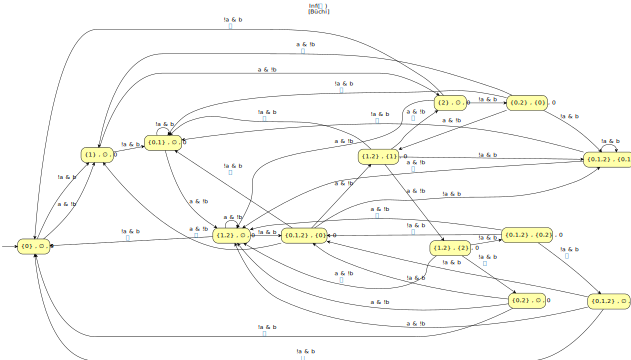

In [4]:
# Display "slim" automaton
semvysledek=spot.automaton("slim.hoa")
display(semvysledek)

In [5]:
!`# semi-determinic automaton from example just for comparison` \
`# it is broken right now, just wanted to commit at this point when slim an automaton appeared :D ` \
seminator --tba --pure --scc-aware=0 -s0 example_for_slim.hoa > semi_deterministic.hoa

seminator: src/seminator.cpp:170: spot::twa_graph_ptr seminator::process_job(spot::twa_graph_ptr): Assertion `spot::is_semi_deterministic(result)' failed.
/usr/bin/sh: line 1: 3595198 Aborted                 (core dumped) `# semi-determinic automaton from example just for comparison` `# it is broken right now, just wanted to commit at this point when slim an automaton appeared :D ` seminator --tba --pure --scc-aware=0 -s0 example_for_slim.hoa > semi_deterministic.hoa


In [6]:
vysledek=spot.automaton("semi_deterministic.hoa")
display(vysledek)

RuntimeError: Failed to read automaton from semi_deterministic.hoa